In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [8]:
# Dataframe for exploratory analysis
df=pd.read_csv('TCS.NS_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4476 non-null   object 
 1   Open       4460 non-null   float64
 2   High       4460 non-null   float64
 3   Low        4460 non-null   float64
 4   Close      4460 non-null   float64
 5   Adj Close  4460 non-null   float64
 6   Volume     4460 non-null   float64
dtypes: float64(6), object(1)
memory usage: 244.9+ KB


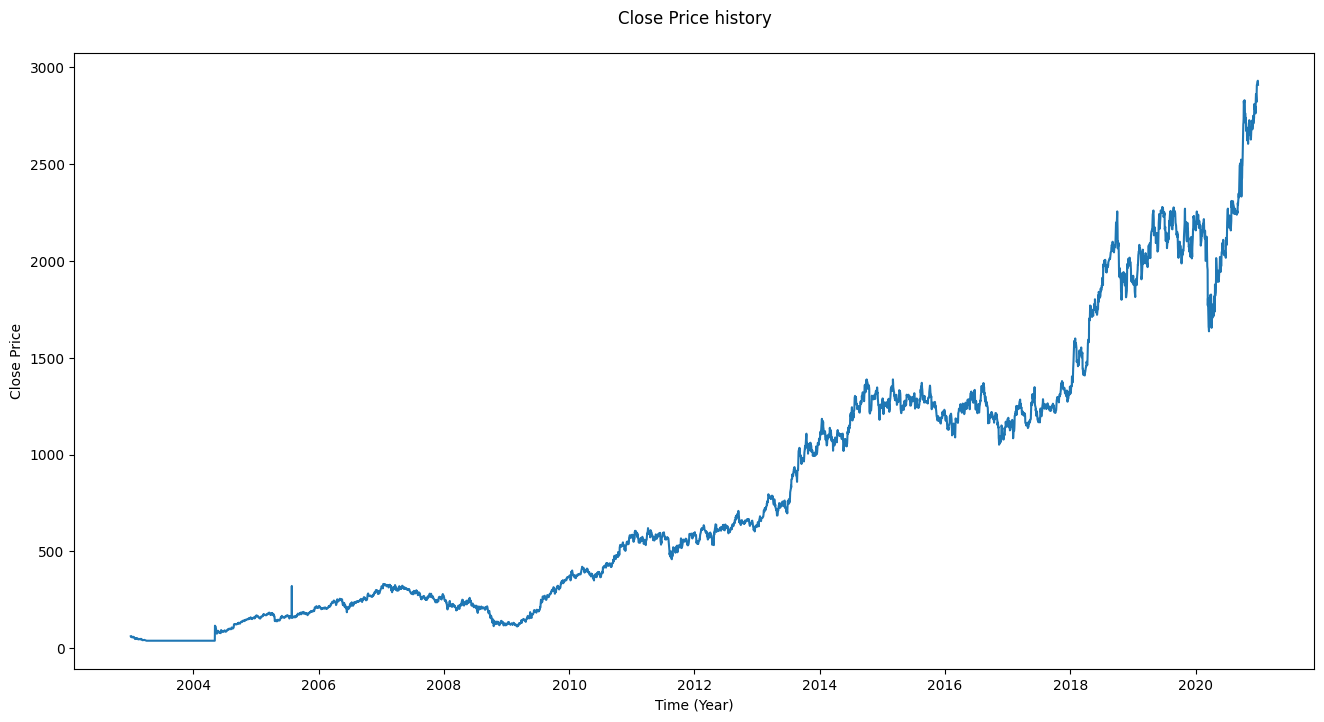

In [10]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [11]:

# fix random seed for reproducibility
np.random.seed(7)

In [12]:

# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
     

In [13]:
df2 = pd.read_csv('TCS.NS_Stock.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [14]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [15]:

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100


C:\Users\Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


597/597 - 3s - 5ms/step - loss: 0.0080
Epoch 2/100
597/597 - 1s - 1ms/step - loss: 5.2740e-05
Epoch 3/100
597/597 - 1s - 2ms/step - loss: 2.8840e-05
Epoch 4/100
597/597 - 1s - 2ms/step - loss: 2.0254e-05
Epoch 5/100
597/597 - 1s - 1ms/step - loss: 1.5431e-05
Epoch 6/100
597/597 - 1s - 1ms/step - loss: 1.3342e-05
Epoch 7/100
597/597 - 1s - 1ms/step - loss: 1.2987e-05
Epoch 8/100
597/597 - 1s - 1ms/step - loss: 1.2651e-05
Epoch 9/100
597/597 - 1s - 2ms/step - loss: 1.3532e-05
Epoch 10/100
597/597 - 1s - 1ms/step - loss: 1.3221e-05
Epoch 11/100
597/597 - 1s - 1ms/step - loss: 1.3634e-05
Epoch 12/100
597/597 - 1s - 2ms/step - loss: 1.3413e-05
Epoch 13/100
597/597 - 1s - 2ms/step - loss: 1.3627e-05
Epoch 14/100
597/597 - 1s - 2ms/step - loss: 1.4103e-05
Epoch 15/100
597/597 - 1s - 1ms/step - loss: 1.4037e-05
Epoch 16/100
597/597 - 1s - 1ms/step - loss: 1.3873e-05
Epoch 17/100
597/597 - 1s - 1ms/step - loss: 1.3635e-05
Epoch 18/100
597/597 - 1s - 2ms/step - loss: 1.4223e-05
Epoch 19/100
597/

In [17]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


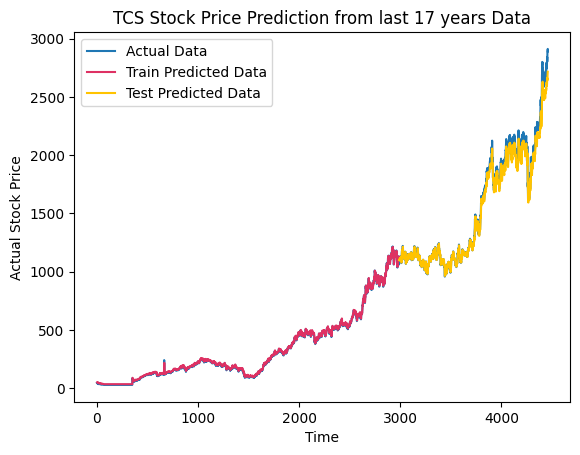

In [18]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('TCS Stock Price Prediction from last 17 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [19]:

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")

Root mean square error of Training  =  9.473323461794195  RMSE
Root mean square error of Testing =  51.92924079982002  RMSE
